# IBM Stock Data

In [1]:
import pandas as pd
import yfinance as yf
from pathlib import Path
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from matplotlib import pyplot as plt

In [2]:
CSV_PATH = Path('./IBMFinanceData')
CSV_PATH.mkdir(parents=True, exist_ok=True)
IBM_NAME = 'IBM.csv'
IBM_PATH = CSV_PATH / IBM_NAME

In [3]:
try:
    IBM = pd.read_csv(IBM_PATH)
except FileNotFoundError:
    IBM = yf.download('IBM', start='2022-10-1', end='2022-12-15')
    IBM.to_csv(IBM_PATH)
IBM.set_index('Date', inplace=True)
IBM.index = pd.to_datetime(IBM.index)
IBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,120.160004,122.209999,119.599998,121.510002,113.363274,4261700
2022-10-04,122.800003,125.650002,122.519997,125.500000,117.085754,4566100
2022-10-05,124.709999,126.459999,124.230003,125.739998,117.309669,3212900
2022-10-06,124.879997,125.300003,121.769997,122.230003,114.035004,5074600
2022-10-07,121.500000,121.800003,118.070000,118.820000,110.853630,4499700


In [4]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2022-10-03 to 2022-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       52 non-null     float64
 1   High       52 non-null     float64
 2   Low        52 non-null     float64
 3   Close      52 non-null     float64
 4   Adj Close  52 non-null     float64
 5   Volume     52 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.8 KB


<Axes: xlabel='Date'>

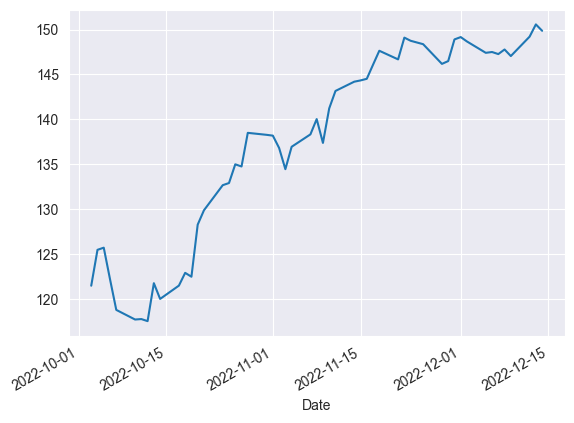

In [5]:
IBM_close = IBM.Close
IBM_close.plot()

Figure(640x480)


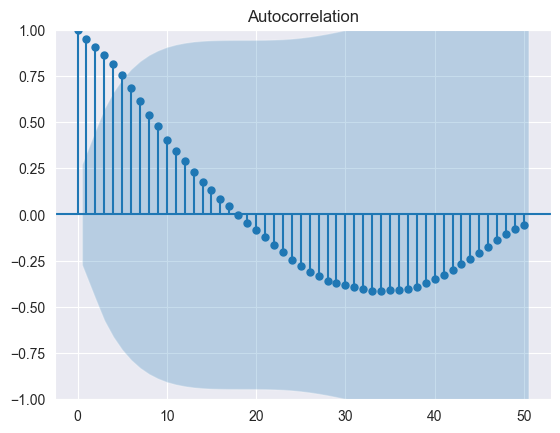

In [6]:
# figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(8, 7))
print(plot_acf(IBM_close, lags=50))

In [7]:
acorr_ljungbox(IBM_close, lags=50, return_df=True)

,lb_stat,lb_pvalue
1,49.647329,1.840204e-12
2,95.709808,1.647704e-21
3,138.188974,9.288204e-30
4,176.923863,3.412790e-37
5,210.847024,1.355455e-43
6,239.542179,7.030763e-49
7,263.157368,4.372785e-53
8,281.815527,3.037163e-56
9,296.638983,1.347450e-58
10,307.566169,3.905238e-60


In [8]:
adfuller(IBM_close)

(-0.9398265301140788,
 0.7745742921429309,
 0,
 51,
 {'1%': -3.5656240522121956,
  '5%': -2.920142229157715,
  '10%': -2.598014675124952},
 155.18452957975032)

<Axes: xlabel='Date'>

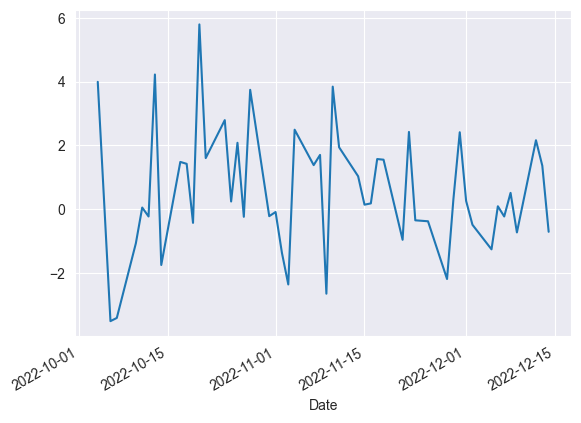

In [9]:
IBM_close_diff = IBM_close.diff()
IBM_close_diff.plot()